This project is an attempt to compare the effectiveness of classical machine learning techniques and neural networks (using real-life data). The data we use is Facebook posts: we predict the amoount of comments a post will get in the next 10/24 hours based on factors such as total follower count and post category. In the end, we find that using a combination of the two was the most successful: a decision tree classifier to decide between 0 comments or at least 1 comment, and a neural network with embeddings to predict the amount of comments.

In [1]:
import sys
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
import numpy as np
from numpy import *
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Normalization,Embedding,Input,Flatten,Concatenate

The source: https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset had many different training and test data sets. We use only one of each for computational speed, since this project is more exploratory in nature.

In [2]:
import numpy as np
import pandas as pd
train_data_v1 = pd.read_csv("FB_Dataset\Training\Features_Variant_1.csv", header = None)
train_data_v1.index = np.arange(1, len(train_data_v1) + 1)
train_data_v1.columns = np.arange(1, len(train_data_v1.columns) + 1)
train_data_v2 = pd.read_csv("FB_Dataset\Training\Features_Variant_2.csv", header = None)
train_data_v2.index = np.arange(1, len(train_data_v2) + 1)
train_data_v2.columns = np.arange(1, len(train_data_v2.columns) + 1)
train_data_v3 = pd.read_csv("FB_Dataset\Training\Features_Variant_3.csv", header = None)
train_data_v3.index = np.arange(1, len(train_data_v3) + 1)
train_data_v3.columns = np.arange(1, len(train_data_v3.columns) + 1)
train_data_v4 = pd.read_csv("FB_Dataset\Training\Features_Variant_4.csv", header = None)
train_data_v4.index = np.arange(1, len(train_data_v4) + 1)
train_data_v4.columns = np.arange(1, len(train_data_v4.columns) + 1)
train_data_v5 = pd.read_csv("FB_Dataset\Training\Features_Variant_5.csv", header = None)
train_data_v5.index = np.arange(1, len(train_data_v5) + 1)
train_data_v5.columns = np.arange(1, len(train_data_v5.columns) + 1)
test_data_c1 = pd.read_csv("FB_Dataset\Testing\TestSet\Test_Case_1.csv", header = None)
test_data_c1.index = np.arange(1, len(test_data_c1) + 1)
test_data_c1.columns = np.arange(1, len(test_data_c1.columns) + 1)
test_data_c2 = pd.read_csv("FB_Dataset\Testing\TestSet\Test_Case_2.csv", header = None)
test_data_c2.index = np.arange(1, len(test_data_c2) + 1)
test_data_c2.columns = np.arange(1, len(test_data_c2.columns) + 1)
test_data_c3 = pd.read_csv("FB_Dataset\Testing\TestSet\Test_Case_3.csv", header = None)
test_data_c3.index = np.arange(1, len(test_data_c3) + 1)
test_data_c3.columns = np.arange(1, len(test_data_c3.columns) + 1)
test_data_c4 = pd.read_csv("FB_Dataset\Testing\TestSet\Test_Case_4.csv", header = None)
test_data_c4.index = np.arange(1, len(test_data_c4) + 1)
test_data_c4.columns = np.arange(1, len(test_data_c4.columns) + 1)
test_data_c5 = pd.read_csv("FB_Dataset\Testing\TestSet\Test_Case_5.csv", header = None)
test_data_c5.index = np.arange(1, len(test_data_c5) + 1)
test_data_c5.columns = np.arange(1, len(test_data_c5.columns) + 1)
test_data_c6 = pd.read_csv("FB_Dataset\Testing\TestSet\Test_Case_6.csv", header = None)
test_data_c6.index = np.arange(1, len(test_data_c6) + 1)
test_data_c6.columns = np.arange(1, len(test_data_c6.columns) + 1)
test_data_c7 = pd.read_csv("FB_Dataset\Testing\TestSet\Test_Case_7.csv", header = None)
test_data_c7.index = np.arange(1, len(test_data_c7) + 1)
test_data_c7.columns = np.arange(1, len(test_data_c7.columns) + 1)
test_data_c8 = pd.read_csv("FB_Dataset\Testing\TestSet\Test_Case_8.csv", header = None)
test_data_c8.index = np.arange(1, len(test_data_c8) + 1)
test_data_c8.columns = np.arange(1, len(test_data_c8.columns) + 1)
test_data_c9 = pd.read_csv("FB_Dataset\Testing\TestSet\Test_Case_9.csv", header = None)
test_data_c9.index = np.arange(1, len(test_data_c9) + 1)
test_data_c9.columns = np.arange(1, len(test_data_c9.columns) + 1)
test_data_c10 = pd.read_csv("FB_Dataset\Testing\TestSet\Test_Case_10.csv", header = None)
test_data_c10.index = np.arange(1, len(test_data_c10) + 1)
test_data_c10.columns = np.arange(1, len(test_data_c10.columns) + 1)
test_data_features = pd.read_csv("FB_Dataset\Testing\Features_TestSet.csv", header = None)
test_data_features.index = np.arange(1, len(test_data_features) + 1)
test_data_features.columns = np.arange(1, len(test_data_features.columns) + 1)
#print(train_data_v1)
#print(test_data_c7)
#print(test_data_features)

The normalization and error functions we will use

In [3]:
def normalize(x):
    return (x-x.min())/(x.max()-x.min())

In [4]:
def error(a, b):
    return mean_squared_error(a, b, squared = False)
    #return mean_absolute_error(a, b)

In [5]:
def maketree(r, c):
    return DecisionTreeRegressor(random_state = r, ccp_alpha = c)

The data set contains some examples with comments after 10 hours, and some with comments after 24 hours. We create a new variable, C/H, that records the amount of comments each hour for the first X hours.

In [6]:
train_data_v1["C/H"] = train_data_v1[54]/train_data_v1[39]
t1X = train_data_v1.copy()
t1X = t1X.drop(columns = 54)
t1X = t1X.drop(columns = 39)
t1y = t1X['C/H']
t1X = t1X.drop(columns = 'C/H')
t1y1 = (t1y > 0).astype(int)


test_data_c1["C/H"] = test_data_c1[54]/test_data_c1[39]
c1X = test_data_c1.copy()
c1X = c1X.drop(columns = 54)
c1X = c1X.drop(columns = 39)
c1y = c1X['C/H']
c1X = c1X.drop(columns = 'C/H')
c1y1 = (c1y > 0).astype(int)

print(t1X)
print(t1y)
print(t1y1)
print(c1X)
print(c1y)

#print(len(t1X))
#print(sum(np.isfinite(t1X)))
#print(len(t1y))
#print(sum(np.isfinite(t1y)))
#print(len(c1X))
#print(sum(np.isfinite(c1X)))
#print(len(c1y))
#print(sum(np.isfinite(c1y)))
#print(np.average(c1y))

            1   2       3   4    5       6           7      8           9   \
1       634995   0     463   1  0.0   806.0   11.291045    1.0   70.495138   
2       634995   0     463   1  0.0   806.0   11.291045    1.0   70.495138   
3       634995   0     463   1  0.0   806.0   11.291045    1.0   70.495138   
4       634995   0     463   1  0.0   806.0   11.291045    1.0   70.495138   
5       634995   0     463   1  0.0   806.0   11.291045    1.0   70.495138   
...        ...  ..     ...  ..  ...     ...         ...    ...         ...   
40945  7170111  70  497000   9  0.0  1881.0  497.200000  269.0  502.318385   
40946  7170111  70  497000   9  0.0  1881.0  497.200000  269.0  502.318385   
40947  7170111  70  497000   9  0.0  1881.0  497.200000  269.0  502.318385   
40948  7170111  70  497000   9  0.0  1881.0  497.200000  269.0  502.318385   
40949  7170111  70  497000   9  0.0  1881.0  497.200000  269.0  502.318385   

        10  ...  44  45  46  47  48  49  50  51  52  53  
1    

Trying to classify no comments vs comments, using a decision tree

1      1
2      1
3      0
4      0
5      0
      ..
96     0
97     0
98     1
99     1
100    0
Name: C/H, Length: 100, dtype: int32
[1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0]
0.4277088614985673 0.41231056256176607


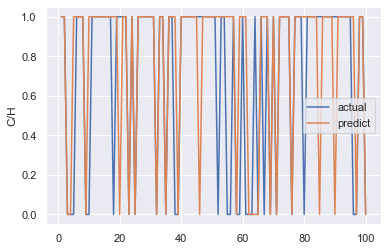

In [7]:
treebool = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.01)
treebool.fit(t1X, t1y1)
t1y1_pred = treebool.predict(t1X)
c1y1_pred = treebool.predict(c1X)
print(c1y1)
print(c1y1_pred)
print(error(t1y1, t1y1_pred), error(c1y1, c1y1_pred))
sns.set()
plt.figure()
sns.lineplot(y = c1y1, x = np.arange(1, len(c1y1)+1), label = "actual")
sns.lineplot(y = c1y1_pred, x = np.arange(1, len(c1y1)+1), label = "predict")
plt.show()

#try setting different threshholds (not 0 but like 1 or 10 or whatever)

Based on the results here, it seems like this decision tree is relatively successful. Given that this serves as an initial "weeder" in the model, these results are more than adequate.

In [8]:
t1X2 = t1X.copy()
t1X2['com'] = t1y1
t1X2 = t1X2[t1X2["com"] == 1]
t1y2 = t1y.copy()
t1y2 = t1y2[t1y > 0]
t1X2 = t1X2.drop(columns = 'com')
t1y2

13       0.125000
22       0.208333
27       0.083333
32       0.625000
39       0.083333
           ...   
40945    0.500000
40946    0.666667
40947    3.000000
40948    3.111111
40949    1.222222
Name: C/H, Length: 18370, dtype: float64

# Classical Machine Learning Techniques

Now, we attempt to run a REGRESSION decision tree on those the posts that were predicted to have comments
The graph created below is using the training data.

0.7556871793956498


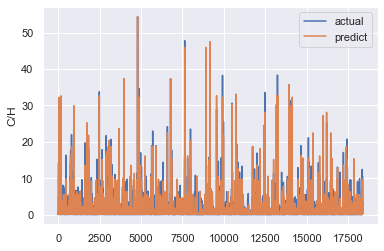

In [9]:
treecom = maketree(42, 0.005)
treecom.fit(t1X2, t1y2)
t1y2_pred = treecom.predict(t1X2)
print(error(t1y2, t1y2_pred))
sns.set()
plt.figure()
sns.lineplot(y = t1y2, x = np.arange(1, len(t1y2)+1), label = "actual")
sns.lineplot(y = t1y2_pred, x = np.arange(1, len(t1y2)+1), label = "predict")
plt.show()

Running it on test data...

[ 2 28  1  2 24  2  3  1  3 45  1  5  1  2  9  6  2  2  9  4 16  4]
11.250661456859085


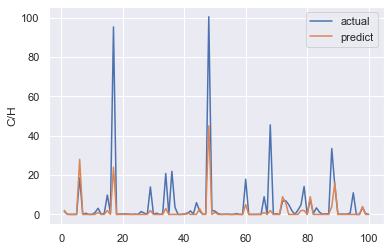

In [10]:
c1y1_pred = treebool.predict(c1X)
c1y1_pred[c1y1_pred > 0] = treecom.predict(c1X[c1y1_pred > 0])
print(c1y1_pred[c1y1_pred > 0])
print(error(c1y, c1y1_pred))
#print(error(np.zeros(len(c1y)), c1y))
sns.set()
plt.figure()
sns.lineplot(y = c1y, x = np.arange(1, len(c1y1)+1), label = "actual")
sns.lineplot(y = c1y1_pred, x = np.arange(1, len(c1y1)+1), label = "predict")
plt.show()

Next, we try another classical machine learning technique: linear regression.

1.7733672393837498


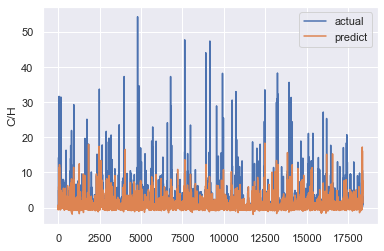

In [11]:
lr = LinearRegression().fit(t1X2, t1y2)
t1y2_pred = lr.predict(t1X2)
print(error(t1y2, t1y2_pred))
sns.set()
plt.figure()
sns.lineplot(y = t1y2, x = np.arange(1, len(t1y2)+1), label = "actual")
sns.lineplot(y = t1y2_pred, x = np.arange(1, len(t1y2)+1), label = "predict")
plt.show()

Even for training data, it is clearly much less accurate.

14.107385614553609


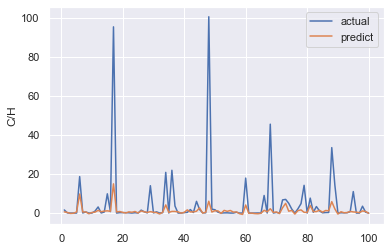

In [12]:
c1y1_pred = treecom.predict(c1X)
c1y1_pred[c1y1_pred > 0] = lr.predict(c1X[c1y1_pred > 0])
#print(c1y1_pred[c1y1_pred > 0])
print(error(c1y, c1y1_pred))
#print(error(np.zeros(len(c1y)), c1y))
sns.set()
plt.figure()
sns.lineplot(y = c1y, x = np.arange(1, len(c1y1)+1), label = "actual")
sns.lineplot(y = c1y1_pred, x = np.arange(1, len(c1y1)+1), label = "predict")
plt.show()

The test results are very unimpressive, although the model does seem to have the right "idea" for some of the points.

# Neural Network

Now, we use a neural network (with ReLu as the activation function) to classify the posts that we think will get at least 1 comment.

In [13]:
def nn(X_train, X_test, y_train, y_test):
    rows, cols = X_train.shape
    adam = tf.keras.optimizers.Adam(learning_rate=0.05)
    BATCH_SIZE = 256
    net = Sequential()
    net.add(Dense(20, input_dim = cols, activation='relu'))
    net.add(Dropout(0.2))
    net.add(Dense(30,  activation='relu'))
    net.add(Dropout(0.2))
    net.add(Dense(40,  activation='relu'))
    net.add(Dropout(0.2))
    net.add(Dense(20,  activation='relu'))
    net.add(Dense(1))
    #net.compile(loss='mean_absolute_error', optimizer='adam')
    net.compile(loss='mean_squared_error', optimizer='adam')
    net.fit(X_train, y_train, epochs = 100, batch_size = BATCH_SIZE)
    y_train_pred = net.predict(X_train).flatten()
    y_test_pred = net.predict(X_test).flatten()
    
    print("train error  ", "  test error")
    print(error(y_train, y_train_pred), error(y_test, y_test_pred))
    print(y_train.shape)
    print(y_train_pred.shape)
    
    trainl = len(y_train)
    testl = len(y_test)
    sns.set()
    plot1 = plt.figure(1)
    sns.lineplot(y = y_train, x = np.arange(1, trainl+1), label = "Train actual")
    sns.lineplot(y = y_train_pred, x = np.arange(1, trainl+1), label = "Train predict")
    plot2 = plt.figure(2)
    sns.lineplot(y = y_test, x = np.arange(1, testl+1), label = "Test actual")
    sns.lineplot(y = y_test_pred, x = np.arange(1, testl+1), label = "Test predict")
    plt.show()
    
    
    return y_test_pred

(100, 52)
(100,)
Epoch 1/100
72/72 [==============================] - 1s 4ms/step - loss: 5.2888
Epoch 2/100
72/72 [==============================] - 0s 4ms/step - loss: 4.6881
Epoch 3/100
72/72 [==============================] - 0s 4ms/step - loss: 4.4267
Epoch 4/100
72/72 [==============================] - 0s 5ms/step - loss: 4.2287
Epoch 5/100
72/72 [==============================] - 0s 5ms/step - loss: 4.0190
Epoch 6/100
72/72 [==============================] - 0s 4ms/step - loss: 3.7190
Epoch 7/100
72/72 [==============================] - 0s 5ms/step - loss: 3.5236
Epoch 8/100
72/72 [==============================] - 0s 5ms/step - loss: 3.2681
Epoch 9/100
72/72 [==============================] - 0s 5ms/step - loss: 3.1607
Epoch 10/100
72/72 [==============================] - 0s 5ms/step - loss: 3.0612
Epoch 11/100
72/72 [==============================] - 0s 5ms/step - loss: 2.9952
Epoch 12/100
72/72 [==============================] - 0s 5ms/step - loss: 2.9922
Epoch 13/100
72/72 [

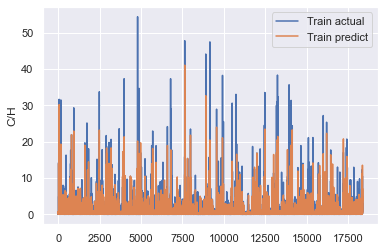

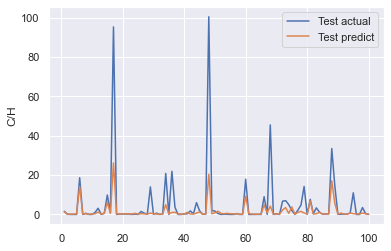

In [14]:

t = [("norm1", MinMaxScaler(), slice(0,3)), ("cat1", OrdinalEncoder(), slice(3,4)), ("norm2", MinMaxScaler(), slice(4,37))]
transformer = ColumnTransformer(transformers = t)
t1X3 = transformer.fit_transform(t1X2.iloc[:, 0:37])
t1X3 = np.concatenate((t1X3, t1X2.iloc[:, 37:]), axis = 1)
#print(t1X3)
#print(t1X3.shape)

c1y1_pred = treecom.predict(c1X)
c1X3 = c1X.copy()
c1X3 = c1X3[c1y1_pred > 0]
c1X3 = np.concatenate((transformer.fit_transform(c1X3.iloc[:, 0:37]), c1X3.iloc[:, 37:]), axis = 1)
c1y3 = c1y[c1y1_pred > 0]
print(c1X3.shape)
print(c1y3.shape)

c1y1_pred[c1y1_pred > 0] = nn(t1X3, c1X3, t1y2, c1y3)
#print(error(c1y, c1y1_pred))
#sns.set()
#plt.figure()
#sns.lineplot(y = c1y, x = np.arange(1, len(c1y1)+1), label = "actual")
#sns.lineplot(y = c1y1_pred, x = np.arange(1, len(c1y1)+1), label = "predict")
#plt.show()

Results are not bad, slightly worse than the decision tree regressor with this sample. Like the decision tree, it seems to predict too "vanilla" (predictions are too similar, not enough highs and lows).

# Neural Network with Embedding

Many of the variables in the data set are categorical (with many categories). Previously, we used simple regression on them, assuming that there is some "ordering" among the categories. This is not ideal.
    
    
Pure one-hot encoding would result in greatly increased computations, which are not ideal either. So, we use embeddings.

In [15]:
def embedding(num_data1, cat_data, num_data2, target, nd1, ohe, nd2, y_test):
    no_of_unique_cat  = len(np.unique(cat_data))
    oh = OneHotEncoder()
    one_hot_encoded_cat_data = oh.fit_transform(cat_data).toarray()
    print(one_hot_encoded_cat_data)
    embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
    embedding_size = int(embedding_size)
    
    
    inp_cat_data = Input(shape=(no_of_unique_cat,))
    inp_num_data1 = Input(shape=(num_data1.shape[1],))
    inp_num_data2 = Input(shape=(num_data2.shape[1],))
    
    BATCH_SIZE = 256
    
    emb = Embedding(input_dim=no_of_unique_cat, output_dim=embedding_size)(inp_cat_data) 
    flatten = Flatten()(emb)
    conc = Concatenate()([inp_num_data1, flatten, inp_num_data2])
    dense1 = Dense(30, activation=tf.nn.relu, )(conc)
    dropout1 = Dropout(0.2,) (dense1)
    dense2 = Dense(25, activation=tf.nn.relu, )(dropout1)
    dropout2 = Dropout(0.2,) (dense2)
    dense3 = Dense(20, activation=tf.nn.relu, )(dropout2)
    dropout3 = Dropout(0.2,) (dense3)
    dense4 = Dense(15, activation=tf.nn.relu, )(dropout3)
    out = Dense(1, activation=None)(dense4)
    model = tf.keras.Model(inputs=[inp_num_data1, inp_cat_data, inp_num_data2], outputs=out)
    
    #model = Sequential()

    #model.compile(optimizer='adam', loss='mean_absolute_error')
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    #print(num_data1.shape)
    #print(one_hot_encoded_cat_data.shape)
    #print(num_data2.shape)
    
    #print(cat_data)
    #print(ohe)
    one_hot_encoded_cat_data2 = oh.transform(ohe).toarray()

    #print(nd1.shape)
    #print(one_hot_encoded_cat_data2.shape)
    #print(nd2.shape)
    
    
    model.fit([num_data1, one_hot_encoded_cat_data, num_data2], target, epochs = 100, batch_size=BATCH_SIZE)
    
    y_train_pred = model.predict([num_data1, one_hot_encoded_cat_data, num_data2]).flatten()
    y_test_pred = model.predict([nd1, one_hot_encoded_cat_data2, nd2]).flatten()
    
    print("train error  ", "  test error")
    print(error(target, y_train_pred), error(y_test, y_test_pred))
    
    trainl = len(target)
    testl = len(y_test)
    sns.set()
    plot1 = plt.figure(1)
    sns.lineplot(y = target, x = np.arange(1, trainl+1), label = "Train actual")
    sns.lineplot(y = y_train_pred, x = np.arange(1, trainl+1), label = "Train predict")
    plot2 = plt.figure(2)
    sns.lineplot(y = y_test, x = np.arange(1, testl+1), label = "Test actual")
    sns.lineplot(y = y_test_pred, x = np.arange(1, testl+1), label = "Test predict")
    plt.show()
    return y_test_pred


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 1/100
72/72 [==============================] - 2s 14ms/step - loss: 4.7710
Epoch 2/100
72/72 [==============================] - 1s 15ms/step - loss: 4.2865
Epoch 3/100
72/72 [==============================] - 1s 17ms/step - loss: 3.7083
Epoch 4/100
72/72 [==============================] - 1s 18ms/step - loss: 3.1509
Epoch 5/100
72/72 [==============================] - 1s 17ms/step - loss: 2.9279
Epoch 6/100
72/72 [==============================] - 1s 19ms/step - loss: 2.7726
Epoch 7/100
72/72 [==============================] - 1s 18ms/step - loss: 2.6636
Epoch 8/100
72/72 [==============================] - 1s 18ms/step - loss: 2.6901
Epoch 9/100
72/72 [==============================] - 1s 19ms/step - loss: 2.5579
Epoch 10/100
72/72 [==============================] - 1s 19ms/step - loss: 2.4701
Epoch 11/100
72/72 [=============

72/72 [==============================] - 2s 27ms/step - loss: 1.4951
Epoch 100/100
72/72 [==============================] - 2s 27ms/step - loss: 1.4242
train error     test error
1.0584410135243587 10.411996597990912


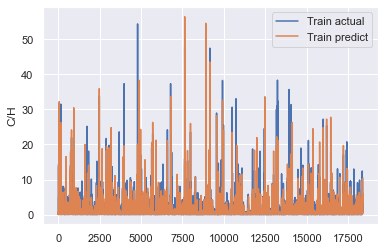

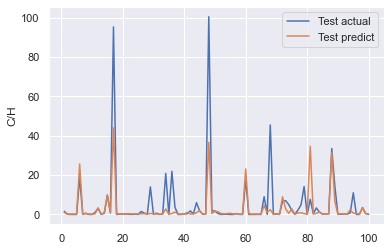

In [16]:
t = [("norm1", MinMaxScaler(), slice(0,3)), ("cat1", OrdinalEncoder(), slice(3,4)),("norm2", MinMaxScaler(), slice(4,37))]
transformer = ColumnTransformer(transformers = t)
t1X4 = transformer.fit_transform(t1X2.iloc[:, 0:37])
t1X4 = np.concatenate((t1X4, t1X2.iloc[:, 37:]), axis = 1)
#print(t1X3)
#print(t1X3.shape)



c1y1_pred = treecom.predict(c1X)
c1X4 = c1X.copy()
c1X4 = c1X4[c1y1_pred > 0]
c1X4 = np.concatenate((transformer.fit_transform(c1X4.iloc[:, 0:37]), c1X4.iloc[:, 37:]), axis = 1)
c1y4 = c1y[c1y1_pred > 0]
#print(t1X4.shape)
#print(c1X4.shape)
#print(t1y2.shape)
#print(c1y4.shape)
#print(c1y4.shape)
#print(t1X4[:, 0:3])
#print(t1X4[:, 3:4])
#print(c1X4[:, 3:4])

c1y1_pred[c1y1_pred > 0] = embedding(t1X4[:, 0:3], t1X4[:, 3:4], t1X4[:, 4:], t1y2, c1X4[:, 0:3], c1X4[:, 3:4], c1X4[:, 4:], c1y4)
#embed_model.layers[1].get_weights()[0]

#print(error(c1y, c1y1_pred))
#sns.set()
#plt.figure()
#sns.lineplot(y = c1y, x = np.arange(1, len(c1y1)+1), label = "actual")
#sns.lineplot(y = c1y1_pred, x = np.arange(1, len(c1y1)+1), label = "predict")
#plt.show()

These are the best results yet. It still tends to underestimate many of the high-comment posts, but it overall does a pretty good job. The training error is also the lowest out of all the models, save for the decision tree (and decision trees are notorious for being able to achieve extremely low training error).

# EXTRA (log transform)

Using log(target) with linear regression (exploration)
We hypothesize that the distribution is roughly logarithmic, so we attempt to explore a linear regression with a log transform.

13       0.125000
22       0.208333
27       0.083333
32       0.625000
39       0.083333
           ...   
40945    0.500000
40946    0.666667
40947    3.000000
40948    3.111111
40949    1.222222
Name: C/H, Length: 18370, dtype: float64
13      -2.079442
22      -1.568616
27      -2.484907
32      -0.470004
39      -2.484907
           ...   
40945   -0.693147
40946   -0.405465
40947    1.098612
40948    1.134980
40949    0.200671
Name: C/H, Length: 18370, dtype: float64
[-1.51030246 -2.1664459  -1.7717223  ...  3.01623298  0.87755756
  1.52495971]
0.9662858531409079
Scaled error
61.16281114530331


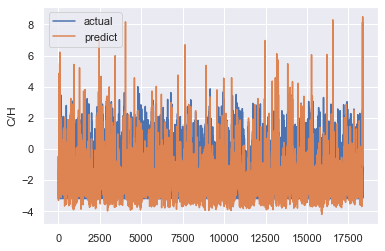

Scaled plot


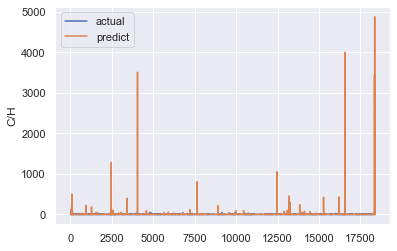

In [28]:
lrlog = LinearRegression().fit(t1X2, np.log(t1y2))
t1ylog_pred = lrlog.predict(t1X2)
print(t1y2)
print(np.log(t1y2))
print(t1ylog_pred)
print(error(np.log(t1y2), t1ylog_pred))
print("Scaled error")
print(error(t1y2, np.e**t1ylog_pred))
sns.set()
plt.figure()
sns.lineplot(y = np.log(t1y2), x = np.arange(1, len(t1y2)+1), label = "actual")
sns.lineplot(y = t1ylog_pred, x = np.arange(1, len(t1y2)+1), label = "predict")
plt.show()
print("Scaled plot")
plt.figure()
sns.lineplot(y = t1y2, x = np.arange(1, len(t1y2)+1), label = "actual")
sns.lineplot(y = np.e**t1ylog_pred, x = np.arange(1, len(t1y2)+1), label = "predict")
plt.show()

2.0194440282795294
Scaled error
156.93217574606643


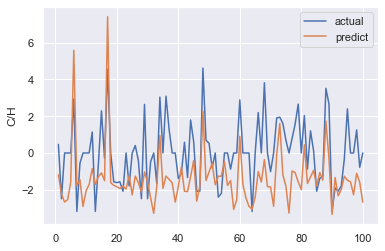

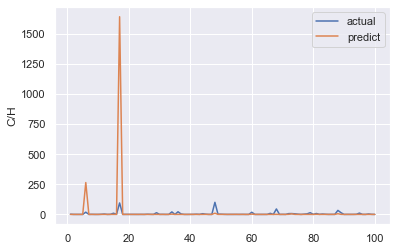

In [27]:
c1y1_pred = treecom.predict(c1X)
c1y1_pred[c1y1_pred > 0] = lrlog.predict(c1X[c1y1_pred > 0])
print(error(np.log(c1y, out=np.zeros_like(c1y), where=(c1y!=0)), c1y1_pred))
print("Scaled error")
print(error(c1y, np.e**c1y1_pred))
sns.set()
plt.figure()
sns.lineplot(y = np.log(c1y, out=np.zeros_like(c1y), where=(c1y!=0)), x = np.arange(1, len(c1y1)+1), label = "actual")
sns.lineplot(y = c1y1_pred, x = np.arange(1, len(c1y1)+1), label = "predict")
plt.show()
print("Scaled plot")
plt.figure()
sns.lineplot(y = c1y, x = np.arange(1, len(c1y1)+1), label = "actual")
sns.lineplot(y = np.e**c1y1_pred, x = np.arange(1, len(c1y1)+1), label = "predict")
plt.show()


We see that the model fits pretty well. However, using the logarithm does mess up our error (and the overal predictions) since linear changes in the logarithm have multiplicative effects on the original.

In conclusion, this does seem to be an effective model, it just has a different purpose (and thus different error) than the others. It would do well in predicting the order of magnitude of comments, rather than the actual amounts.